In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) =  mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

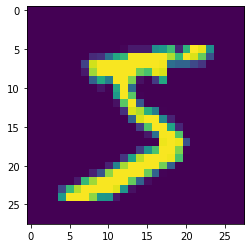

In [7]:
plt.imshow(single_image)


In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train )

In [12]:
y_example.shape

(60000, 10)

In [13]:
#This indicates to class number 5
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

**Scalling the data**


In [18]:
X_train = X_train/255


In [19]:
X_test = X_test/255

In [20]:
scaled_image = X_train[0]

In [21]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
scaled_image.max()

1.0

In [23]:
scaled_image.min()

0.0

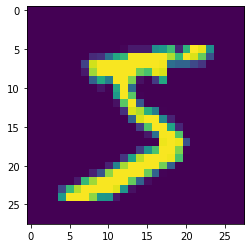

In [24]:
plt.imshow(scaled_image)

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
#batch_size,width,height,color_channels

X_train = X_train.reshape(60000,28,28,1)
X_test  =  X_test.reshape(10000,28,28,1)

**Training the model**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten


In [28]:
28/4

7.0

In [29]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))


#OUTPUT LAYER
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [30]:
  from tensorflow.keras.callbacks import EarlyStopping

In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [32]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 3ms/step - loss: 0.1364 - accuracy: 0.9588 - val_loss: 0.0657 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0353 - val_accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9898 - val_loss: 0.0362 - val_accuracy: 0.9880


In [33]:
metrics = pd.DataFrame(model.history.history)

In [34]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.136398,0.958833,0.065736,0.9787
1,0.048692,0.985067,0.035285,0.9871
2,0.031813,0.989850,0.036229,0.9880


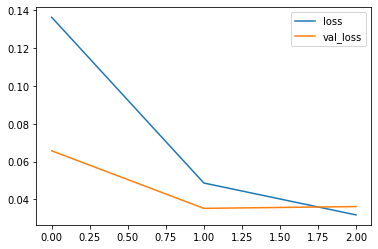

In [35]:
metrics[['loss','val_loss']].plot()

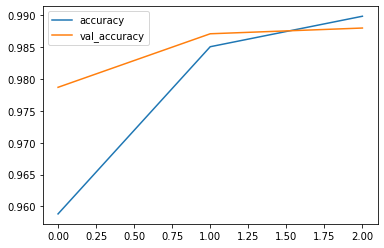

In [36]:
metrics[['accuracy','val_accuracy']].plot()

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.036229152232408524, 0.9879999756813049]

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
y_cat_test.shape

(10000, 10)

In [42]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [44]:
 print(confusion_matrix(y_test,predictions))

[[ 974    0    0    1    0    1    2    0    2    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   0    2 1020    1    1    0    0    4    4    0]
 [   0    0    2 1000    0    1    0    1    5    1]
 [   0    1    0    0  974    0    4    0    0    3]
 [   2    0    0    8    0  874    1    0    5    2]
 [   4    2    0    1    1    4  940    0    6    0]
 [   0    3    6    2    0    0    0 1015    1    1]
 [   3    0    1    0    0    0    0    0  969    1]
 [   0    2    0    5    9    5    0    4    3  981]]


In [45]:
import seaborn as sns

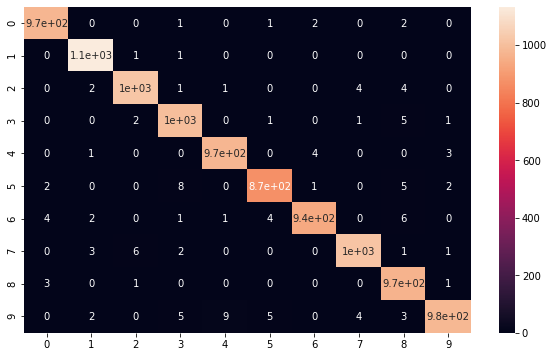

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [47]:
my_number = X_test[0]

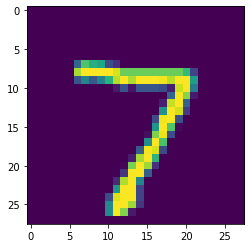

In [48]:
plt.imshow(my_number.reshape(28,28))

In [49]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

array([7])

The handwritten digit was 7 and the model accurately recognized it as 7.



In [50]:
my_number2 = X_test[1]

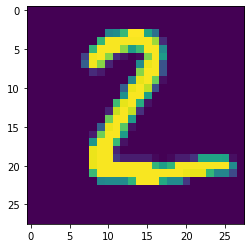

In [51]:
plt.imshow(my_number2.reshape(28,28))

In [52]:
np.argmax(model.predict(my_number2.reshape(1,28,28,1)), axis=-1)

array([2])

The handwritten digit was 2 and the model accurately recognized it as 2.


In [53]:
my_number3 = X_test[8]

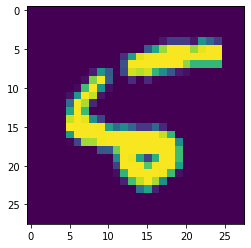

In [54]:
plt.imshow(my_number3.reshape(28,28))

In [55]:
np.argmax(model.predict(my_number3.reshape(1,28,28,1)), axis=-1)

array([5])

The handwritten digit was 5 and the model accurately recognized it as 5.
